# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import importlib
import seaborn as sns

import data_processing as dp  # own functions and logic
importlib.reload(dp)  # this makes it so that 
                      # the file with our functions is re-read every time, 
                      # in case we have made modifications

<module 'data_processing' from '/Users/manonlaralandrieux/ADA2024/ada-2024-project-thedataminions/analysis/data_processing.py'>

# Configure path to data files

In [3]:
# define the path to the folder where the YouNiverse dataset is stored here

# when adding your own path, don't remove the existing path, just comment it
# in this way, everyone can quickly uncomment their own path
#dataset_root_path = "/media/andreas/Backup Plus/youniverse_dataset/"   #andreas
#dataset_root_path = "D:/youniverse/"                                    #mila
dataset_root_path = "/Volumes/DISQUE_SAUVEGARDE_MANON_LANDRIEUX/dataset/"  #manon

# Preprocessing

## Loading the data

In [ ]:
# load channel data (no chunks needed, as the file is not very large)
#df_channels = pd.read_csv(dataset_root_path + "df_channels_en.tsv.gz", compression="infer", sep="\t") #andreas 
df_channels = pd.read_csv(dataset_root_path + "df_channels_en.tsv", compression="infer", sep="\t") # manon 

In [11]:
# load a small part of video and comment data, to try functions on them etc.
# these datasets should not be used for calculations, as they don't contain all the data

# load (first 100000 rows of) video data
#df_videos = pd.read_json(dataset_root_path + "yt_metadata_en.jsonl.gz", compression="infer", lines=True, nrows=100000)Â #andreas 
df_videos = pd.read_json(dataset_root_path + "yt_metadata_en.jsonl", compression="infer", lines=True, nrows=1000000) #manon
# load (first 1000000 rows of) comment data
#df_comments = pd.read_csv(dataset_root_path + "youtube_comments.tsv.gz", compression="infer", sep="\t", nrows=1000000) #andreas
df_comments = pd.read_csv(dataset_root_path + "youtube_comments.tsv", compression="infer", sep="\t", nrows=1000000) #manon

In [12]:
df_channels.head()

category_cc   join_date                   channel  \
0         Gaming  2010-04-29  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
1      Education  2006-09-01  UCbCmjCuTUZos6Inko4u57UQ   
2  Entertainment  2006-09-20  UCpEhnqL0y41EpW2TvWAHD7Q   
3  Howto & Style  2016-11-15  UC295-Dw_tDNtZXFeAPAW6Aw   
4         Sports  2007-05-11  UCJ5v_MCY6GNUBTO8-D3XoAg   

                   name_cc  subscribers_cc  videos_cc  subscriber_rank_sb  \
0                PewDiePie       101000000       3956                 3.0   
1  Cocomelon - Nursery ...        60100000        458                 7.0   
2                SET India        56018869      32661                 8.0   
3          5-Minute Crafts        60600000       3591                 9.0   
4                      WWE        48400000      43421                11.0   

   weights  
0    2.087  
1    2.087  
2    2.087  
3    2.087  
4    2.087

In [13]:
# definition of "readers", i.e., objects that we can iterate through 
# and always get a chunk of the dataframe in each iteration

def videos_in_chunks(chunksize: int = 100000) -> pd.io.json._json.JsonReader:
    """
    Returns a Json reader which can be iterated through, to get chunks of the (unfiltered) video dataset.

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the Json reader
    """
    #return pd.read_json(dataset_root_path + "yt_metadata_en.jsonl.gz", #andreas
    return pd.read_json(dataset_root_path + "yt_metadata_en.jsonl", #manon
                        compression="infer", lines=True, chunksize=chunksize, nrows=1000000, )   # uncomment this to only use the first million videos, for testing
                                           # (remove the paranthesis above as well)

def comments_in_chunks(chunksize: int = 1000000) -> pd.io.parsers.readers.TextFileReader:
    """
    Returns a CSV reader which can be iterated through, to get chunks of the (unfiltered) comment dataset.

    Args:
        chunksize: number of entries in each chunk

    Returns:
        the CSV reader
    """
    #return pd.read_csv(dataset_root_path + "youtube_comments.tsv.gz", #andreas
    return pd.read_csv(dataset_root_path + "youtube_comments.tsv", #manon
                       compression="infer", sep="\t", chunksize=chunksize, nrows = 10000000)  # uncomment this to only use the first 10 million comments, for testing
                                            # (remove the paranthesis above as well)

# Intro : topics distribution on YouTube
With this analysis we want to show that News&Politics is a popular category of both videos and channels to justify our choice.  

category_cc  number_of_channels
0        Autos & Vehicles                3705
1                  Comedy                3767
2               Education                7803
3           Entertainment               22951
4      Film and Animation                6875
5                  Gaming               20143
6           Howto & Style               11875
7                   Music               24285
8         News & Politics                2263
9   Nonprofits & Activism                 969
10         People & Blogs               18413
11         Pets & Animals                1292
12   Science & Technology                4864
13                 Sports                5148
14        Travel & Events                1989

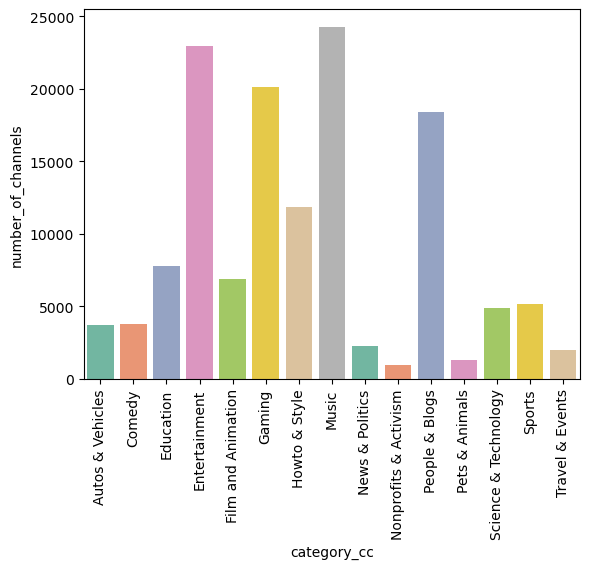

In [14]:
#distribution of categories for the channels 
category_channel= df_channels.groupby('category_cc').agg(number_of_channels=('category_cc', 'size')).reset_index()
display(category_channel)
ax = sns.barplot(x="category_cc", y="number_of_channels", data=category_channel,hue="category_cc", palette='Set2')
plt.xticks(rotation=90)
plt.show()

#instead of saying it goes in our way we could say , that it is already a small category which can lead to more isolation as people are less interested 
#and there exists less various sources thus clustering can happen more easily 

In [15]:
#distribution of categories for the videos for the first 100000 rows 

category_videos= df_videos.groupby('categories').agg(number_of_videos=('categories', 'size')).reset_index()
display(category_videos)
ax = sns.barplot(x="categories", y="number_of_videos", data=category_videos,hue="categories", palette='Set2')
plt.xticks(rotation=90)
plt.show()

#even if it isnt on the whole dataset (only on 1000000 first rows) we see here that the news & politics is a popular category for videos comapred to channels 

categories  number_of_videos
0                                         7
1        Autos & Vehicles             14360
2                  Comedy             23249
3               Education             46987
4           Entertainment            158501
5        Film & Animation             39635
6                  Gaming            199862
7           Howto & Style             52860
8                   Music            129925
9         News & Politics            145768
10  Nonprofits & Activism             14823
11         People & Blogs             89726
12         Pets & Animals              5363
13   Science & Technology             27999
14                 Sports             39043
15        Travel & Events             11892

## Filtering for NaNs and ' ' (here in youtube_comments.tsv.gz)

Pending questions to TA (good practices): 
- is the analysis of useless data (NaN and '' rows) required for justification of their removal, or can we just go with the filtering only ?
- are we allowed to filter once the dataset is already reduced to e.g one channel, or do we have to filter in the very beginning (painful) ?

In [ ]:
#replace empty character '' with NaN and remove rows containing NaN
filtered_df = dp.run_simple_function_on_chunks_concat(comments_in_chunks(), 
                                        lambda x: x.replace('Gkb1QMHrGvA', np.nan).dropna(),
                                        print_time=(1000000, 8600000000))

Going through chunk 0...
The first 1000000 entries have been processed. 8599000000 left.
2.047 secs per chunk on average. Meaning  293.436 minutes left.
Going through chunk 1...
The first 2000000 entries have been processed. 8598000000 left.
1.951 secs per chunk on average. Meaning  279.547 minutes left.
Going through chunk 2...
The first 3000000 entries have been processed. 8597000000 left.
1.917 secs per chunk on average. Meaning  274.606 minutes left.
Going through chunk 3...
The first 4000000 entries have been processed. 8596000000 left.
1.895 secs per chunk on average. Meaning  271.484 minutes left.
Going through chunk 4...
The first 5000000 entries have been processed. 8595000000 left.
1.939 secs per chunk on average. Meaning  277.761 minutes left.
Going through chunk 5...
The first 6000000 entries have been processed. 8594000000 left.
2.197 secs per chunk on average. Meaning  314.651 minutes left.
Going through chunk 6...
The first 7000000 entries have been processed. 8593000000

In [ ]:
#filtered df
display(filtered_df)

author     video_id  likes  replies
1             1  CNtp0xqoods      0        0
2             1  249EEzQmVmQ      1        0
3             1  _U443T2K_Bs      0        0
4             1  rJbjhm0weYc      0        0
5             2  EpHERODJ7gM      0        0
...         ...          ...    ...      ...
9999995  664459  GC3gqIbrK7c      9        1
9999996  664459  GC3gqIbrK7c      1        0
9999997  664459  i9VRGaoFw8k      1        1
9999998  664459  -JLWZ1jz3FY      0        2
9999999  664459  -JLWZ1jz3FY      0        0

[9999999 rows x 4 columns]

If we have to analyze NaN rows before filtering, then use this code:

In [ ]:
# get the entries of the comment dataframe which have a na value in any column
nans = dp.run_simple_function_on_chunks_concat(comments_in_chunks(), 
                                        lambda x: dp.get_na_entries(x, "any", reverse=False),
                                        print_time=(1000000, 8600000000))

Going through chunk 0...
The first 1000000 entries have been processed. 8599000000 left.
1.593 secs per chunk on average. Meaning  228.242 minutes left.
Going through chunk 1...
The first 2000000 entries have been processed. 8598000000 left.
1.485 secs per chunk on average. Meaning  212.856 minutes left.
Going through chunk 2...
The first 3000000 entries have been processed. 8597000000 left.
1.461 secs per chunk on average. Meaning  209.287 minutes left.
Going through chunk 3...
The first 4000000 entries have been processed. 8596000000 left.
1.555 secs per chunk on average. Meaning  222.726 minutes left.
Going through chunk 4...
The first 5000000 entries have been processed. 8595000000 left.
1.624 secs per chunk on average. Meaning  232.621 minutes left.
Going through chunk 5...
The first 6000000 entries have been processed. 8594000000 left.
1.643 secs per chunk on average. Meaning  235.383 minutes left.
Going through chunk 6...
The first 7000000 entries have been processed. 8593000000

In [ ]:
# count the entries of the comment dataframe which have a na value in any column

counted_nans = dp.run_simple_function_on_chunks_concat(comments_in_chunks(), 
                                                lambda x: dp.count_na_entries(x, "any", reverse=False),
                                                print_time=(1000000, 8600000000)).sum(axis=0)

Going through chunk 0...
The first 1000000 entries have been processed. 8599000000 left.
1.338 secs per chunk on average. Meaning  191.752 minutes left.
Going through chunk 1...
The first 2000000 entries have been processed. 8598000000 left.
1.330 secs per chunk on average. Meaning  190.553 minutes left.
Going through chunk 2...
The first 3000000 entries have been processed. 8597000000 left.
1.283 secs per chunk on average. Meaning  183.879 minutes left.
Going through chunk 3...
The first 4000000 entries have been processed. 8596000000 left.
1.271 secs per chunk on average. Meaning  182.041 minutes left.
Going through chunk 4...
The first 5000000 entries have been processed. 8595000000 left.
1.266 secs per chunk on average. Meaning  181.289 minutes left.
Going through chunk 5...
The first 6000000 entries have been processed. 8594000000 left.
1.265 secs per chunk on average. Meaning  181.245 minutes left.
Going through chunk 6...
The first 7000000 entries have been processed. 8593000000

In [ ]:
display(counted_nans)

na rows              0
total rows    10000000
dtype: int64

## Filtering the datasets to our needs

### Filtering **videos** by category 'News & Politics'

In [ ]:
# filter the video dataframe to only include videos from n&p category

df_videos_news_pol = dp.run_simple_function_on_chunks_concat(videos_in_chunks(chunksize=100000),
                                                             lambda x: x[x.categories == "News & Politics"], 
                                                             print_time=(100000, 72924794))

Going through chunk 0...
The first 100000 entries have been processed. 72824794 left.
4.727 secs per chunk on average. Meaning  57.371 minutes left.
Going through chunk 1...
The first 200000 entries have been processed. 72724794 left.
4.874 secs per chunk on average. Meaning  59.080 minutes left.
Going through chunk 2...
The first 300000 entries have been processed. 72624794 left.
4.654 secs per chunk on average. Meaning  56.328 minutes left.
Going through chunk 3...
The first 400000 entries have been processed. 72524794 left.
4.546 secs per chunk on average. Meaning  54.955 minutes left.
Going through chunk 4...
The first 500000 entries have been processed. 72424794 left.
4.345 secs per chunk on average. Meaning  52.453 minutes left.
Going through chunk 5...
The first 600000 entries have been processed. 72324794 left.
4.196 secs per chunk on average. Meaning  50.581 minutes left.
Going through chunk 6...
The first 700000 entries have been processed. 72224794 left.
4.148 secs per chunk

In [ ]:
display(df_videos_news_pol)

categories                channel_id                  crawl_date  \
1827    News & Politics  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:42.593675   
7605    News & Politics  UCzWLsxDD373D4tY8kN-0LGQ  2019-11-05 00:42:33.012228   
18005   News & Politics  UCzVBu6oqlrAix0oq9T2rBFg  2019-11-19 20:40:22.403775   
24361   News & Politics  UCzUV5283-l5c0oKRtyenj6Q  2019-11-22 08:47:10.520209   
24362   News & Politics  UCzUV5283-l5c0oKRtyenj6Q  2019-11-22 08:46:16.481889   
...                 ...                       ...                         ...   
999870  News & Politics  UCrUkx0UAxgybbbMvWphd62Q  2019-11-10 14:27:26.687460   
999871  News & Politics  UCrUkx0UAxgybbbMvWphd62Q  2019-11-10 14:27:27.273595   
999872  News & Politics  UCrUkx0UAxgybbbMvWphd62Q  2019-11-10 14:27:27.847348   
999873  News & Politics  UCrUkx0UAxgybbbMvWphd62Q  2019-11-10 14:27:28.400609   
999874  News & Politics  UCrUkx0UAxgybbbMvWphd62Q  2019-11-10 14:27:32.321224   

                                              description  dislike_count  \
1827                                      retrogamer3.com           16.0   
7605    What are the forces at work that have created ...            0.0   
18005   Social Media:\n\nFacebook.com/thebookoflaura\n...           89.0   
24361   ðŸ‘• Order your shirts here: https://Teespring.co...          195.0   
24362   ðŸ‘• Order your shirts here: https://Teespring.co...          114.0   
...                                                   ...            ...   
999870  The Young Turks recently posted a video entitl...            2.0   
999871  Patriots I need your help growing the American...            0.0   
999872  Patriots I need your help growing the American...            1.0   
999873  Patriots I need your help growing the American...            2.0   
999874  Link to video by Conservative Youtuber ABL, An...            2.0   

         display_id  duration  like_count  \
1827    dfa8RRkKoa4      9251        25.0   
7605    _dIIEMvH86k       309         9.0   
18005   eWXefhNB2po       707       625.0   
24361   MBgzne7djFU       378     47027.0   
24362   AbH3pJnFgY8       278     36384.0   
...             ...       ...         ...   
999870  Rmq0JmUbt8k       857        25.0   
999871  ts__Orp310M        49        34.0   
999872  bQ3_ZMVpiio       298         6.0   
999873  q92A939Nyj8       388         2.0   
999874  CPYdzsvg-Ns       573        18.0   

                                                     tags  \
1827               RetroGamer3,Live Stream,politics,Trump   
7605        NWO,Ebola,Ukraine,Mainstream,Media,Pyschology   
18005   michael jackson,lyrics,music video,court,child...   
24361   Funny,Entertainment,Fun,Laughing,Educational,L...   
24362   Funny,Entertainment,Fun,Laughing,Educational,L...   
...                                                   ...   
999870  American Joe,American Joe Show,The Young Turks...   
999871                     American Joe,American Joe Show   
999872  American Joe,American Joe Show,Michael Avenatt...   
999873  American Joe,American Joe Show,Midterm Electio...   
999874  American Joe,American Joe Show,Jim Acosta Dona...   

                                                    title  \
1827                         Retrogamer3 Political Stream   
7605    Adam Curtis describes the Surkow Strategy of M...   
18005     my thoughts on the michael jackson documentary.   
24361   Elizabeth Warren Gets a Big Surprise at the Ai...   
24362                                  No More Twitter? ðŸ˜‚   
...                                                   ...   
999870  Young Turks Caught Lying and Race Baiting.... ...   
999871  President says he will send migrant Children B...   
999872  Creepy Porn Lawyer, and Woman Beater Michael A...   
999873         Midterm Fallout - How Bad is it For Trump?   
999874  Trump Vs. Jim Acosta - The Fake News is at it ...   

                upload_date  view_count  
1827    2018-08-23 00:00:00       478.0  
7605    2015-01-04 00:00:00

### Filtering **channels** by category News & Politics

In [ ]:
#filter channels dataset to only include n&p
df_channels_news_pol = df_channels[df_channels.category_cc == "News & Politics"]

In [ ]:
display(df_channels_news_pol)

category_cc   join_date                   channel  \
129     News & Politics  2006-08-26  UCttspZesZIDEwwpVIgoZtWQ   
133     News & Politics  2012-06-01  UCRWFSbif-RFENbBrSiez1DA   
212     News & Politics  2017-03-03  UCmphdqZNmqL72WJ2uyiNw5w   
268     News & Politics  2015-03-23  UCx8Z14PpntdaxCt2hakbQLQ   
337     News & Politics  2007-06-19  UCIvaYmXn910QMdemBG3v1pQ   
...                 ...         ...                       ...   
135820  News & Politics  2010-08-07  UC5rxiCGcNunIi5zI1hMYLMg   
135825  News & Politics  2013-02-01  UCLSEJQ8TWtlEkaytaa4Y7lw   
135901  News & Politics  2012-10-19  UCnkG_c5cyemVVsgCDoHiXew   
136231  News & Politics  2017-11-25  UC69lWS7UMbBQc-9yqp4nGjA   
136301  News & Politics  2017-03-26  UCpbE1CJWNHpu8knuok8YBZQ   

                    name_cc  subscribers_cc  videos_cc  subscriber_rank_sb  \
129                 IndiaTV        15177282     139814               199.0   
133                ABP NEWS        16274836     129027               207.0   
212          ABP NEWS HINDI        10800000      51298               340.0   
268           The Lallantop         9120000       9423               438.0   
337                Zee News         9280000     102648               549.0   
...                     ...             ...        ...                 ...   
135820        Salman Akhtar           10400         40            962468.0   
135825        WingsOfChrist           10420         61            962547.0   
135901  The American Mirror           10500        329            963417.0   
136231      Patriotism Show           10320         46            975448.0   
136301    Jenny Constantine           10200         30            978433.0   

        weights  
129      2.0870  
133      2.0870  
212      2.0870  
268      2.0870  
337      2.0870  
...         ...  
135820  53.1435  
135825  53.1435  
135901  53.1435  
136231  53.1435  
136301  53.1435  

[2263 rows x 8 columns]

In [ ]:
# check if all videos we found in news&pol are also pulished by a channel in category n&p

df_videos_news_pol[np.logical_not(df_videos_news_pol.channel_id.isin(df_channels_news_pol.channel))]



categories                channel_id                  crawl_date  \
1827    News & Politics  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:42.593675   
7605    News & Politics  UCzWLsxDD373D4tY8kN-0LGQ  2019-11-05 00:42:33.012228   
18005   News & Politics  UCzVBu6oqlrAix0oq9T2rBFg  2019-11-19 20:40:22.403775   
28840   News & Politics  UCzTmNzBxLEHbpZNOCpUTWbA  2019-11-03 04:38:01.617657   
28860   News & Politics  UCzTmNzBxLEHbpZNOCpUTWbA  2019-11-03 04:38:06.565138   
...                 ...                       ...                         ...   
970869  News & Politics  UCrXcatz6wlNHjuqgf-tglOA  2019-11-07 00:55:48.241832   
991815  News & Politics  UCrVnMcE3GIyg2rM4gH34YWg  2019-11-10 10:02:03.075065   
998347  News & Politics  UCrV-WEtbXrRIkgWgbXLAvcQ  2019-10-31 15:06:30.119011   
998349  News & Politics  UCrV-WEtbXrRIkgWgbXLAvcQ  2019-10-31 15:06:31.498209   
998365  News & Politics  UCrV-WEtbXrRIkgWgbXLAvcQ  2019-10-31 15:06:41.975562   

                                              description  dislike_count  \
1827                                      retrogamer3.com           16.0   
7605    What are the forces at work that have created ...            0.0   
18005   Social Media:\n\nFacebook.com/thebookoflaura\n...           89.0   
28840   A young man is living a normal life with no ca...           16.0   
28860                                          Short Film            1.0   
...                                                   ...            ...   
970869  As promised, our Wet Head Challenge using the ...            3.0   
991815  More Travel News...\nhttp://www.petergreenberg...            0.0   
998347  Â© 2012 WMG  Webisode by Mutemath from The Blue...            3.0   
998349  Â© 2012 WMG  Webisode by Mutemath from Park Wes...            2.0   
998365  Â© 2012 WMG  Webisode by Mutemath from The Goth...            0.0   

         display_id  duration  like_count  \
1827    dfa8RRkKoa4      9251        25.0   
7605    _dIIEMvH86k       309         9.0   
18005   eWXefhNB2po       707       625.0   
28840   ck6Yl8TNoWs      1257       452.0   
28860   tjUajxZAIZ8       422        15.0   
...             ...       ...         ...   
970869  lIuK9DGtOx8       321       141.0   
991815  aSWbywb7SBE       423         1.0   
998347  H8-Al6B_J1g       106        17.0   
998349  wYI6dWaEHjk        56         8.0   
998365  Gs5jw7rtrn8       216        27.0   

                                                     tags  \
1827               RetroGamer3,Live Stream,politics,Trump   
7605        NWO,Ebola,Ukraine,Mainstream,Media,Pyschology   
18005   michael jackson,lyrics,music video,court,child...   
28840   JoiRida,Cheatham,JoiRidaCheatham,Accepted,Detr...   
28860   Joi.Rida,Cheatham,joiridacheatham,dread,loc,up...   
...                                                   ...   
970869  challenge,wet,head,gross,wet head challenge,we...   
991815  2008,Travel Inspiration,clinton,Presidential,P...   
998347          mutemath,wbr,INDMUSIC,warner bros records   
998349          INDMUSIC,wbr,mutemath,warner bros records   
998365                   wbr,warner bros records,INDMUSIC   

                                                    title  \
1827                         Retrogamer3 Political Stream   
7605    Adam Curtis describes the Surkow Strategy of M...   
18005     my thoughts on the michael jackson documentary.   
28840                 Accepted - Award Winning Short Film   
28860         JoiRida Twin Visit (Introducing Jive Viper)   
...                                                   ...   
970869                Gross Smoothie Wet Head Challenge ðŸ˜•   
991815      2008 Presidential Candidates Travel Scorecard   
998347  Mutemath - What Happens Before The Show [Webis...   
998349        Mutemath - Built for Destruction [Webisode]   
998365  Mutemath - The Gothic Theatre in Denver [Webis...   

                upload_date  view_count  
1827    2018-08-23 00:00:00       478.0  
7605    2015-01-04 00:00:00   

**We see that indeed, not all videos in the news and politics category belong to a channel in this category!**
A google search shows that apparently, you don't have to have the same category for all videos, but you set a "default" channel category which will be used for videos if you don't change it manually. Also, you can probably change the default category after a while if you want.

This is the reason why most of the news&pol videos are uploaded by a news&pol channe, but not all.

In the paper about the dataset, the authors say that the channel category is actually the "most frequent category", so I guess the video categories are the most relevant, as they are the true categories.

We could try to verify this, if we want to.

### Filtering the N&P videos by a list of channels

In [ ]:
# form the filtered N&P videos dataframe, keep those posted by channels manually selected (here CNN, Fox News, BBC News and MSNBC)

df_videos_news_pol_manually_selected = df_videos_news_pol[df_videos_news_pol.channel_id.isin(["UCupvZG-5ko_eiXAupbDfxWw",  # CNN
                                                                                              "UCXIJgqnII2ZOINSWNOGFThA",  # Fox News
                                                                                              "UC16niRr50-MSBwiO3YDb3RA",  # BBC News
                                                                                              "UCaXkIU1QidjPwiAYu6GcHjg",  # MSNBC
                                                                                            ])]

In [ ]:
df_videos_news_pol_manually_selected

Empty DataFrame
Columns: [categories, channel_id, crawl_date, description, dislike_count, display_id, duration, like_count, tags, title, upload_date, view_count]
Index: []

### Doing our own ranking of N&P channels (not necessary)

In [ ]:
# sort the previously filtered n&p channels by subscriber count according to channel crawler
#df_channels_news_pol_sort_subscribers = df_channels_news_pol.sort_values(by="subscribers_cc", ascending=False)

In [ ]:
#display(df_channels_news_pol_sort_subscribers)

### Filtering **videos** in a specific channel
Note: This function doesn't have to be done on the whole video dataset, as it is done here, since we have previously filtered N&P videos of specific channels.
Therefore, we would also not need chunks here.

Todo: simplify the function like this:

df_videos_news_pol_manually_selected.loc[df_videos_news_pol_manually_selected.channel_id == <channel id of the desired channel>]


In [ ]:
# filter the video dataset to get only videos from a specific channel (here: random channel)

videos_from_channel_test = dp.run_simple_function_on_chunks_concat(
    videos_in_chunks(chunksize=100000),
    lambda x: x.loc[x.channel_id == "UCzWrhkg9eK5I8Bm3HfV-unA"],
    print_time=(100000, 72924794))

Going through chunk 0...
The first 100000 entries have been processed. 72824794 left.
4.383 secs per chunk on average. Meaning  53.197 minutes left.
Going through chunk 1...
The first 200000 entries have been processed. 72724794 left.
4.894 secs per chunk on average. Meaning  59.320 minutes left.
Going through chunk 2...
The first 300000 entries have been processed. 72624794 left.
5.154 secs per chunk on average. Meaning  62.384 minutes left.
Going through chunk 3...
The first 400000 entries have been processed. 72524794 left.
5.209 secs per chunk on average. Meaning  62.960 minutes left.
Going through chunk 4...
The first 500000 entries have been processed. 72424794 left.
4.883 secs per chunk on average. Meaning  58.936 minutes left.
Going through chunk 5...
The first 600000 entries have been processed. 72324794 left.
4.698 secs per chunk on average. Meaning  56.631 minutes left.
Going through chunk 6...
The first 700000 entries have been processed. 72224794 left.
4.577 secs per chunk

### Filtering **comments** in a specific channel

This second function probably needs to look like this, as we haven't preprocessed the comment data yet, so it is still too big to be considered all at once, so we need the chunks.

In [ ]:
# get comments on videos from a specific channel using the ids from filtered video dataset

comments_from_channel_test = dp.run_simple_function_on_chunks_concat(
    comments_in_chunks(chunksize=1000000), 
    lambda df: df[df.video_id.isin(videos_from_channel_test.display_id)],
    print_time=(1000000, 8600000000))

Going through chunk 0...
The first 1000000 entries have been processed. 8599000000 left.
1.515 secs per chunk on average. Meaning  217.056 minutes left.
Going through chunk 1...
The first 2000000 entries have been processed. 8598000000 left.
1.874 secs per chunk on average. Meaning  268.605 minutes left.
Going through chunk 2...
The first 3000000 entries have been processed. 8597000000 left.
1.919 secs per chunk on average. Meaning  274.950 minutes left.
Going through chunk 3...
The first 4000000 entries have been processed. 8596000000 left.
1.906 secs per chunk on average. Meaning  273.121 minutes left.
Going through chunk 4...
The first 5000000 entries have been processed. 8595000000 left.
1.851 secs per chunk on average. Meaning  265.222 minutes left.
Going through chunk 5...
The first 6000000 entries have been processed. 8594000000 left.
1.948 secs per chunk on average. Meaning  279.084 minutes left.
Going through chunk 6...
The first 7000000 entries have been processed. 8593000000

In [ ]:
display(comments_from_channel_test.head())

author     video_id  likes  replies
6868268  453667  3vQK78eUg2A      2        1
7094579  468696  SWZG-ba1qDk     15       18
8912192  594074  hn2zYwqSINY      0        1

### Plots 
1. Using the previous functions, plot the tot nb of comments and/or subscribers in the selected channels (all on same plot).

2. For each channel, plot the distribution of comments for all the users.

## Selecting the cluster of users in a specific channel 

(flexible function where you give the threshold of x comments)


In [ ]:
#returns df with users_id and total number of comments made in a specific channel
def get_metadata_commenters(comment_channelX,x):
    metadata_commenters = comment_channelX.groupby('author').agg(number_of_comments=('author', 'size')).reset_index()
    metadata_commenters['number_of_videos']= comment_channelX.groupby('author')['video_id'].nunique().values
    
    #keep users that wrote more than x comments 
    metadata_commenters=metadata_commenters[metadata_commenters['number_of_comments']>=x]
    return metadata_commenters

#test with threshold x=0
metadata_commenters= get_metadata_commenters(comments_from_channel_test,0)
display(metadata_commenters)

author  number_of_comments  number_of_videos
0  453667                   1                 1
1  468696                   1                 1
2  594074                   1                 1

### Plots
1. Venn diagram with clusters of the channels and underline overlaps

# Deeper analysis and statistics
Todo: 
create dataset of all comments which are under a video in the news and politics category

use this dataset to get the list of videos under which each of the users we found (above) have made a comment

for each pair of users, calculate "number of videos in common (under which both have commented) / min number of videos both users have commented on"
(example: mila commented on 10 videos, andreas on 100 videos, they have 8 videos they both commented on, so the value we calculate is 8/10 = 0.8)
